## Power analysis 

#### for "Functional specificity of local synaptic connections in neocortical networks"
##### by Ko, Hofer, Pichler, Buchanan, Sjostrom, Mrsic-Flogel 2011    
##### Nature Letter, doi:10.1038/nature09880

In [23]:
from platform import python_version
print(python_version())

%run -i 'imports_functions.py' 

%matplotlib inline

3.10.4


[Ko et al. 2011](https://www.nature.com/articles/nature09880) (Fig. 2d) results show that co-tuned cells are preferably connected (left below).     
![Ko et al. 2011, Fig. 2d](resources/Ko2011_Fig2d.png "Ko et al. 2011, Fig. 2d") 

However, the results should be evaluated from the full perspective of the numbers in this study.

Over 16 mice, 126 cells in total were recorded, 116 cells both *in-vivo* and *in-vitro*.      
Of these cells, 94 were orientation selective, and 26 were connected.      
Of these, 10 were co-tuned (orientation preference delta within 22.5 deg).

Please, note the modest quantity of cells that are orientation-selective **and** connected compared to those orientation selective (donut chart below). 

<>:2: DeprecationWarning: invalid escape sequence '\D'


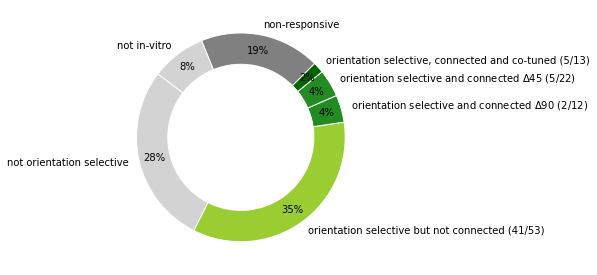

In [24]:
Ko_data = np.array([0., 0., 22., 10., 33, 41., 5., 5., 2.])
Ko_labels = [None, None, 'non-responsive', 'not in-vitro', 'not orientation selective', 'orientation selective but not connected (41/53)', 'orientation selective and connected $\Delta$90 (2/12)', 'orientation selective and connected $\Delta$45 (5/22)', 'orientation selective, connected and co-tuned (5/13)']

fig, ax = plt.subplots(figsize=[12.8,4.8])
size = 0.3 # to have wedges
inner_colors = ['gray','gray','gray','lightgray','lightgray', 'yellowgreen','forestgreen','forestgreen','darkgreen']
ax.pie(Ko_data, radius=1, labels=Ko_labels, autopct=lambda pct:'{:1.0f}%'.format(pct) if pct > 0 else '', startangle=45, pctdistance=0.85, colors=inner_colors, labeldistance=1.1, wedgeprops=dict(width=size, edgecolor='w'))
plt.show()
fig.clear()
fig.clf()

### Power analysis

For the study of Ko et al., we would like to know if the number of orientation selective, co-tuned, and connected cells is sufficient to know whether it is a general trend or not.

In neuroscience, there is a tacit assumption that cortex in general, and V1 in particular is a (fixed-point) attractor network, much like the successfull Hopfield model, capable of performing pattern recognition.      
This assumption is not unfolded nor tested by Ko et al. 2011. Here we aim at giving a simple estimation of what it would take to test it.

Considering 10um tickness for a 2P plane of 0.5x0.5 mm (cit), it gives roughly 10000 neurons for V1 cortex.      
In a Hopfield network, of this size, with 5% sparse connectivity density, the chance of finding units (neurons) with the same orientation preference that are also strongly connected is influenced by several factors. First, neurons with similar orientation preferences have a chance of being connected just by 5% random assignment. Second, neurons that prefer similar orientations are more likely to be co-active when exposed to stimuli with matching orientations, and this co-activation can lead to the strengthening of connections between them.

Ko et al. 2011 found 10 couples of co-active and co-tuned neurons.      
We can use statistical power analysis to know the **required number of samples** to be performed to be able to trust the trends found in the study. The goal is to achieve a desired level of statistical power (e.g., 80%) while maintaining a chosen significance level (e.g., α = 0.05).      

The total number of samples will depend on how many orientation patterns were investigated. Since Ko et al. have 8 distinct orientation patterns, the sampling process need to be repeated for each pattern and accumulating the results.

I can provide a simplified estimation of the required sample size (n_required) for one orientation pattern with the given parameters:

- Desired statistical power (1 - β): 80% (0.80)
- Significance level (α): 0.05
- Expected effect size (p_effect): let's assume a moderate effect size, say 0.20.

To estimate the required sample size, we used a power analysis library like statsmodels.     
Here we used the `TTestPower` class from `statsmodels` to perform a power analysis. It calculates the required sample size based on the specified effect size, alpha level, and desired power, assuming we are interested in comparing a sample to the hypothesized population mean (random connections).

In [25]:
import statsmodels.stats.power as smp

# Define parameters
effect_size = 0.2 # minimal
alpha = 0.05
power = 0.8 # usually required in biological studies
# power = 0.7 # try other values

# Perform power analysis
analysis = smp.TTestPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

print(f"Required Sample Size for each orientation: {sample_size:.0f}")
print(f"Total Sample Size: {sample_size * 8:.0f}")


Required Sample Size for each orientation: 198
Total Sample Size: 1585


http://www.biostathandbook.com/power.html

https://influentialpoints.com/Training/statistical_power_and_sample_size.htm